In [1]:
!pip install selenium
!pip install bs4

In [2]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import pandas as pd

#soup = BeautifulSoup(html_doc)

In [3]:
weblink = "https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&ref_=adv_prv"
response = requests.get(weblink)
read_text = response.text
read_text;


#html_doc = response.read()
#soup = BeautifulSoup(html_doc, 'html.parser')
#print (soup.title)

In [4]:
soup = BeautifulSoup(read_text)
#print(soup.prettify())

List basic html tags
Different basic commands for webscraping using beautiful soup

In [5]:
list(soup.children);

In [6]:
#soup.find_all('a', href=True)
#for x in soup.find_all('a', attrs={'href':re.compile("http://")}): print(x.string) #a = hyperlink

links = [a.get('href') for a in soup.find_all('a', href=True)]
links;

In [7]:
for x in soup.find_all('a'): print(x.string) #a = hyperlink

None
Release Calendar
Top 250 Movies
Most Popular Movies
Browse Movies by Genre
Top Box Office
Showtimes & Tickets
Movie News
India Movie Spotlight
What's on TV & Streaming
Top 250 TV Shows
Most Popular TV Shows
Browse TV Shows by Genre
TV News
India TV Spotlight
What to Watch
Latest Trailers
IMDb Originals
IMDb Picks
IMDb Podcasts
Oscars
Best Picture Winners
Best Picture Winners
Emmys
STARmeter Awards
San Diego Comic-Con
New York Comic-Con
Sundance Film Festival
Toronto Int'l Film Festival
Awards Central
Festival Central
All Events
Born Today
Most Popular Celebs
Most Popular Celebs
Celebrity News
Help Center
Contributor Zone
Polls
None
None
None
None
None
Sign In
None
 Compact

None
Next »
Popularity
A-Z
None
Number of Votes
US Box Office
Runtime
Year
Release Date
Date of Your Rating
Your Rating
None
The Shawshank Redemption
1
2
3
4
5
6
7
8
9
10
X
Frank Darabont
Tim Robbins
Morgan Freeman
Bob Gunton
William Sadler
Top 250
None
Kantara
1
2
3
4
5
6
7
8
9
10
X
Rishab Shetty
Rishab Shetty

In [8]:
links = [soup.find_all('p')] #paragraphs
links;

In [9]:
links = [soup.find_all('li')] #paragraphs
links;
#<div class="lister-item mode-advanced">

In [10]:
movies = soup.find_all('div', class_='lister-item mode-advanced')

In [11]:
title = []
ratings = []
metascore = []
genre = []
year = []
test = []
cast = []
votes = []
count = 51

for page in range(20):
    movies = soup.find_all('div', class_='lister-item mode-advanced')
    for movie in movies:
        title.append(movie.h3.a.text)
        ratings.append(movie.find('div', class_ = 'inline-block ratings-imdb-rating').strong.text)
    
        if movie.find('span', class_ = "metascore") is not None:
            metascore.append(movie.find('span', class_ = "metascore").text.strip())
        else:
            metascore.append(None)
        
        genre.append(movie.find('span',class_ = 'genre').text.strip())
        year.append(movie.find('span', class_ = 'lister-item-year text-muted unbold').text)
        
        votes.append(movie.find('span', attrs={'name':'nv'}).text)
        
        cast.append(movie.find('p',class_ = "").text.strip().replace('\n' ,' '))
    
        
        
    weblink = f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start={count}&ref_=adv_next"
    response = requests.get(weblink)
    read_text = response.text
    soup = BeautifulSoup(read_text)
    count+=50
      

#title = soup.h3.a.text
metascore;

In [12]:
directorList = []
castList = []
for director in cast:
    directorList.append(director.split("|")[0].replace("Director:","").replace("Directors:", ""))
    castList.append(director.split("|")[1].replace("Stars:",""))
    

df = pd.DataFrame({'Movie Title': title, 'Rating': ratings, 'Metascore': metascore, 'Genre': genre, 'Year':year, 'Votes':votes, "Directors": directorList, "Cast":castList})
df.index = range(1,len(df)+1)
df.style.set_properties(**{'text-align': 'left'})

,Movie Title,Rating,Metascore,Genre,Year,Votes,Directors,Cast
1,The Shawshank Redemption,9.3,81,Drama,(1994),"2,656,326",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler"
2,Kantara,9.2,None,"Action, Adventure, Drama",(2022),"58,245",Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G., Achyuth Kumar"
3,The Godfather,9.2,100,"Crime, Drama",(1972),"1,841,081",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Keaton"
4,The Dark Knight,9.0,84,"Action, Crime, Drama",(2008),"2,628,937",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine"
5,The Lord of the Rings: The Return of the King,9.0,94,"Action, Adventure, Drama",(2003),"1,831,418",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom"
6,Schindler's List,9.0,94,"Biography, Drama, History",(1993),"1,345,635",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caroline Goodall"
7,The Godfather Part II,9.0,90,"Crime, Drama",(1974),"1,261,370",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton"
8,12 Angry Men,9.0,96,"Crime, Drama",(1957),"784,273",Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John Fiedler"
9,Jai Bhim,8.9,None,"Crime, Drama, Mystery",(2021),"200,317",T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha Vijayan"
10,Pulp Fiction,8.9,94,"Crime, Drama",(1994),"2,033,155",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis"


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import numpy as np
import copy
#%matplotlib inline

In [14]:
df['Rating'] = df['Rating'].astype(float)
df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df["Votes"].astype("int")
#print(new_df)
print(df.dtypes)

Movie Title     object
Rating         float64
Metascore       object
Genre           object
Year            object
Votes            int32
Directors       object
Cast            object
dtype: object


In [15]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Rating', 'Votes']])
    sse.append(km.inertia_)

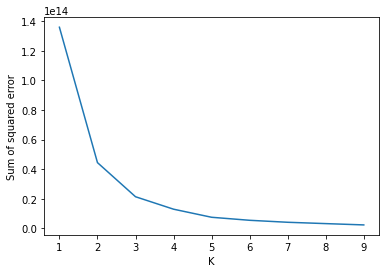

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

Text(0, 0.5, 'Rating')

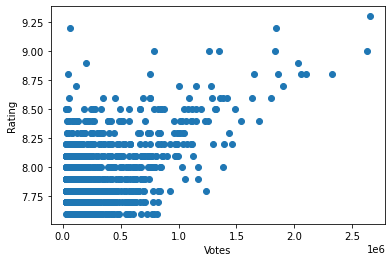

In [17]:
plt.scatter(df['Votes'], df['Rating'])
plt.xlabel('Votes')
plt.ylabel('Rating')

In [18]:
km = KMeans(n_clusters=3)
print(km)
y_prediction = km.fit_predict(df[['Rating', 'Votes']])
y_prediction;

KMeans(n_clusters=3)


In [19]:
df['cluster'] = y_prediction
#print(df)

[[7.91469330e+00 1.16458900e+05]
 [8.44782609e+00 1.33059109e+06]
 [7.98130435e+00 5.78290683e+05]]


<function matplotlib.pyplot.legend(*args, **kwargs)>

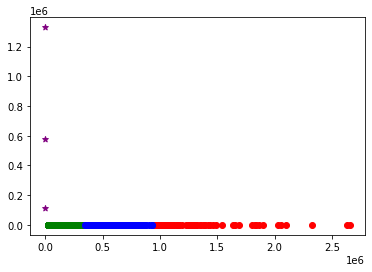

In [20]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Votes'], df1['Rating'], color='green')
plt.scatter(df2['Votes'], df2['Rating'], color='red')
plt.scatter(df3['Votes'], df3['Rating'], color='blue')

print(km.cluster_centers_)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
            color='purple', marker='*')
plt.legend

In [21]:
df['RatingScaled'] = copy.deepcopy(df['Rating'])
df['VotesScaled'] = copy.deepcopy(df['Votes'])

In [22]:
scaler = MinMaxScaler()

scaler.fit(df[['RatingScaled']])
df['RatingScaled'] = scaler.transform(df[['RatingScaled']])

scaler.fit(df[['VotesScaled']])
df['VotesScaled'] = scaler.transform(df[['VotesScaled']])

In [23]:
km = KMeans(n_clusters=3)
#km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['RatingScaled', 'VotesScaled']])
df['new-cluster'] = y_predicted

[[0.09400666 0.06936595]
 [0.49882353 0.42645662]
 [0.3136725  0.07395934]]


<function matplotlib.pyplot.legend(*args, **kwargs)>

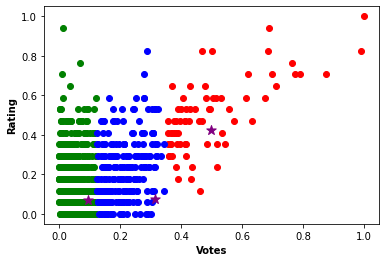

In [24]:
#Just rerun scatter plot (shows python's interactiveness) 
#or I can run this chunk

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
#df3 = new_df[new_df.cluster == 3]

plt.scatter(df1['VotesScaled'], df1['RatingScaled'], color='green')
plt.scatter(df2['VotesScaled'], df2['RatingScaled'], color='red')
plt.scatter(df3['VotesScaled'], df3['RatingScaled'], color='blue')
#plt.scatter(df4['Votes'], df4['Rating'], color='black')

print(km.cluster_centers_)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
            color='purple', marker='*', label='centroid', s=100)
plt.xlabel('Votes', fontweight ='bold')
plt.ylabel('Rating', fontweight ='bold')
plt.legend

In [25]:
from sklearn.linear_model import LinearRegression
#X = df['Votes'].str.replace(',',"").astype(int).values.reshape(-1,1)
X = df['VotesScaled'].values.reshape(-1,1)
y = df['RatingScaled'].values


x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
clf = LinearRegression()
clf.fit(x_train, y_train)
clf.predict([[11]])
clf.score(x_test,y_test)

0.19680616925633254

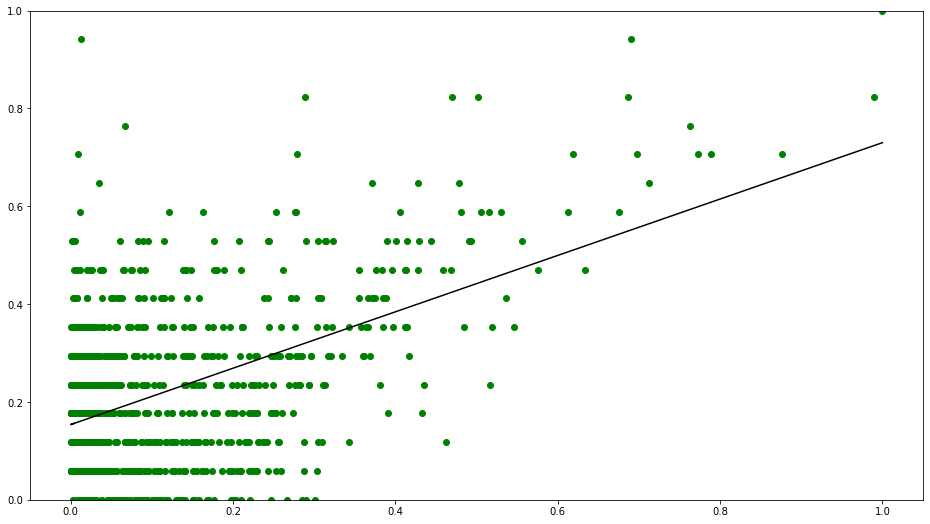

In [26]:
plt.figure(figsize = (16, 9))
plt.scatter(X, y,color='g')
plt.plot(X, clf.predict(X),color='k')
plt.ylim(min(y), max(y))
plt.show()

In [27]:
import numpy as np
df['Avg Rating'] = (df.groupby('Directors')['Rating'].transform('mean'))
df.columns = df.columns.str.strip()
df['Directors'] = df['Directors'].apply(lambda x: x.strip())
df['Directors'] == "Frank Darabont"

df['Clusters'] = np.where((df['Avg Rating'] > 8.6) & (df['Avg Rating'] <= 9.2), 1,
                            np.where((df['Avg Rating'] > 8.1) & (df['Avg Rating'] <= 8.6), 2,
                            np.where((df['Avg Rating'] >= 7.6) & (df['Avg Rating'] <= 8.1), 3, 'Else')))

df

,Movie Title,Rating,Metascore,Genre,Year,Votes,Directors,Cast,cluster,RatingScaled,VotesScaled,new-cluster,Avg Rating,Clusters
1,The Shawshank Redemption,9.3,81,Drama,(1994),2656326,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunt...",1,1.000000,1.000000,1,8.950000,1
2,Kantara,9.2,None,"Action, Adventure, Drama",(2022),58245,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishor...",0,0.941176,0.012426,1,9.200000,1
3,The Godfather,9.2,100,"Crime, Drama",(1972),1841081,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan,...",1,0.941176,0.690112,1,8.420000,2
4,The Dark Knight,9.0,84,"Action, Crime, Drama",(2008),2628937,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron E...",1,0.823529,0.989589,1,8.462500,2
5,The Lord of the Rings: The Return of the King,9.0,94,"Action, Adventure, Drama",(2003),1831418,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McK...",1,0.823529,0.686439,1,8.440000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Sabrina,7.6,72,"Comedy, Drama, Romance",(1954),65534,Billy Wilder,"Humphrey Bogart, Audrey Hepburn, Will...",0,0.000000,0.015196,0,8.133333,2
997,From Here to Eternity,7.6,85,"Drama, Romance, War",(1953),47377,Fred Zinnemann,"Burt Lancaster, Montgomery Clift, Deb...",0,0.000000,0.008295,0,7.775000,3
998,Snow White and the Seven Dwarfs,7.6,95,"Animation, Adventure, Family",(1937),199887,"William Cottrell, David Hand, Wilfred Jackso...","Adriana Caselotti, Harry Stockwell, L...",0,0.000000,0.066266,0,7.600000,3
999,The 39 Steps,7.6,93,"Crime, Mystery, Thriller",(1935),57461,Alfred Hitchcock,"Robert Donat, Madeleine Carroll, Luci...",0,0.000000,0.012128,0,8.030769,3


[[1.         0.74264706]
 [3.         0.17018634]
 [2.         0.38943064]]


0.3803303894250132

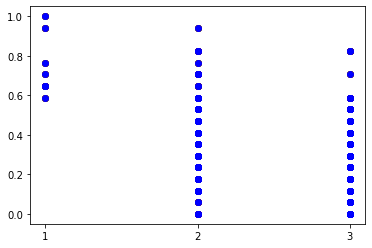

In [28]:
scaler = MinMaxScaler()
scaler.fit(df[['Rating']])
df['Rating'] = scaler.transform(df[['Rating']])

scaler.fit(df[['Clusters']])
plt.scatter(df['Clusters'], df['Rating'], color='green')


km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Clusters', 'Rating']])
df['new-cluster'] = y_predicted

plt.scatter(df['Clusters'], df['Rating'], color='green')
plt.scatter(df['Clusters'], df['Rating'], color='red')
plt.scatter(df['Clusters'], df['Rating'], color='blue')

print(km.cluster_centers_)
plt.legend

X = df['Clusters'].values.reshape(-1,1)
y = df['Rating'].values


x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
clf = LinearRegression()
clf.fit(x_train, y_train)
clf.predict([[11]])
clf.score(x_test,y_test)


In [29]:
#would wanna use to try and predict metascore or votes data
#R^2 generally at or below .5 when predicting human behavior
#https://statisticsbyjim.com/regression/interpret-r-squared-regression/

#print(X)
#plt.figure(figsize = (16, 9))
#plt.scatter(X, y,color='g')
#plt.plot(X, clf.predict(X),color='k')
#plt.ylim(min(y), max(y))
#plt.show()